## <small>

Copyright (c) 2017-21 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>

# Deep Learning: A Visual Approach

## by Andrew Glassner, https://glassner.com

### Order: https://nostarch.com/deep-learning-visual-approach

### GitHub: https://github.com/blueberrymusic

---

### What's in this notebook

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is cleaned up a bit from the original code that I hacked together, and is only lightly commented. I wrote the code to be easy to interpret and understand, even for those who are new to Python. I tried never to be clever or even more efficient at the cost of being harder to understand. The code is in Python3, using the versions of libraries as of April 2021.

This notebook may contain additional code to create models and images not in the book. That material is included here to demonstrate additional techniques.

Note that I've included the output cells in this saved notebook, but Jupyter doesn't save the variables or data that were used to generate them. To recreate any cell's output, evaluate all the cells from the start up to that cell. A convenient way to experiment is to first choose "Restart & Run All" from the Kernel menu, so that everything's been defined and is up to date. Then you can experiment using the variables, data, functions, and other stuff defined in this notebook.


## Chapter 1: Overview of Machine Learning

Miscellaneous figures for Chapter 1


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2
# note: to install cv2 (also called opencv) on conda, run this (via https://anaconda.org/conda-forge/opencv):
# conda install -c conda-forge opencv

import seaborn as sns

sns.set_theme()

In [2]:
# Make a File_Helper for saving and loading files.

save_files = False

import os, sys, inspect

# current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# sys.path.insert(0, os.path.dirname(current_dir))  # path to parent dir
sys.path.append("../")
from DLBasics_Utilities import File_Helper

file_helper = File_Helper(save_files)

In [3]:
# Generate an image of unrolled data
fig = plt.figure()
ax = Axes3D(fig)

xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []
for z in range(zres):
  for y in range(yres):
    for x in range(xres):
      xvals.append(x)
      yvals.append(y)
      zvals.append(0)
      cols.append(x)

ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap="rainbow", c=cols, s=50)
file_helper.save_figure("swiss-roll-1")
plt.show()

<Figure size 640x480 with 0 Axes>

In [4]:
# Now roll up the data in a "Swiss roll"
fig = plt.figure()
ax = Axes3D(fig)

xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []
for z in range(zres):
  for y in range(yres):
    for x in range(xres):
      angle = math.pi * 3 * x / xres
      radius = 1 - (0.8 * x / xres)
      xvals.append(radius * np.cos(angle))
      yvals.append(y)
      zvals.append(radius * np.sin(angle))
      cols.append(x)

ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap="rainbow", c=cols, s=50)
file_helper.save_figure("swiss-roll-2")
plt.show()

<Figure size 640x480 with 0 Axes>

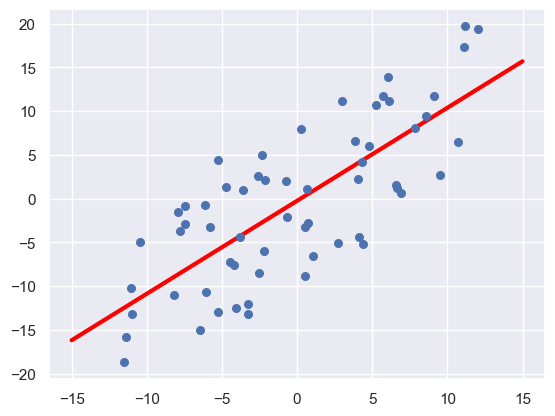

In [5]:
# Fit a line to some random data and draw the data and line.
np.random.seed(42)
num_points = 60
xvals = np.linspace(-10, 10, num_points)
xvals += np.random.uniform(-4, 4, num_points)
yvals = xvals + np.random.uniform(-10, 10, num_points)
plt.scatter(xvals, yvals, s=30, zorder=20)

model = LinearRegression(fit_intercept=True)
lr_xvals = xvals.reshape(len(xvals), 1)
model.fit(lr_xvals, yvals)

xpred = [[-15], [15]]
ypred = model.predict(xpred)
plt.plot(xpred, ypred, color="red", lw=3, zorder=10)
file_helper.save_figure("straight-fit.png")

plt.show()

In [6]:
# A little routine to help us make a model for fitting a polynomial to data
def PolynomialRegression(degree, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

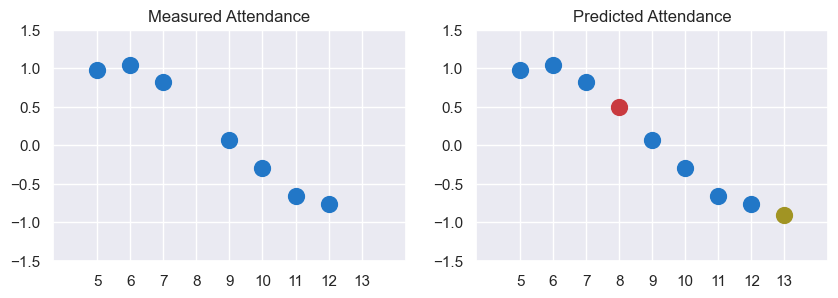

In [7]:
# Show the measured data for attendance at a concert (from a piece of
# a sine wave) and then interpolate the missing points. Draw both the
# original data, and the original data plus the interpolated points.

np.random.seed(42)
num_points = 9

xvals = np.linspace(1.5, 4.5, num_points)
yvals = np.sin(xvals) + np.random.uniform(-0.1, 0.10, num_points)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
scatter_x = [xvals[i] for i in [0, 1, 2, 4, 5, 6, 7]]
scatter_y = [yvals[i] for i in [0, 1, 2, 4, 5, 6, 7]]
plt.scatter(scatter_x, scatter_y, s=130, color="#2277C7")
plt.xticks(np.linspace(1.5, 4.5, 9), range(5, 5 + 9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title("Measured Attendance")

plt.subplot(1, 2, 2)

poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)
poly_model.fit(pr_xvals, yvals)
xpred = [[xvals[3]], [xvals[8]]]
ypred = poly_model.predict(xpred)
plt.scatter(scatter_x, scatter_y, color="#2277C7", s=130, zorder=20)

plt.scatter(xpred[0], ypred[0], color="#C93A3F", s=130)
plt.scatter(xpred[1], ypred[1], color="#A19423", s=130)
plt.xticks(np.linspace(1.5, 4.5, 9), range(5, 5 + 9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title("Predicted Attendance")

file_helper.save_figure("concert-predictions.png")

plt.show()

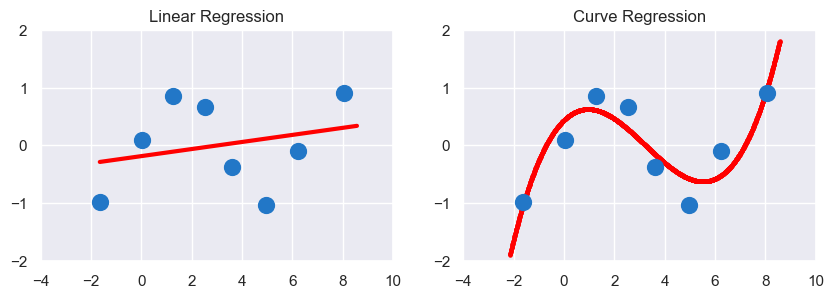

In [8]:
# Create linear and polynomial regressions to a piece of a sine wave.

np.random.seed(42)
num_points = 8

xvals = np.linspace(-np.pi / 2, 2.5 * np.pi, num_points)
xvals += np.random.uniform(-0.3, 0.3, num_points)
yvals = np.sin(xvals) + np.random.uniform(-0.1, 0.10, num_points)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.scatter(xvals, yvals, s=130, zorder=20, color="#2277C7")

model = LinearRegression(fit_intercept=True)
pr_xvals = xvals.reshape(len(xvals), 1)
model.fit(pr_xvals, yvals)
xpred = [[min(xvals)], [max(xvals) + 0.5]]
ypred = model.predict(xpred)
plt.plot(xpred, ypred, color="red", lw=3, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(xvals, yvals, s=130, zorder=20, color="#2277C7")
poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)
poly_model.fit(pr_xvals, yvals)

xpred = np.linspace(min(xvals) - 0.5, max(xvals) + 0.5, 1500)
xpred = xpred.reshape(len(xpred), 1)
ypred = poly_model.predict(xpred)
plt.scatter(xpred, ypred, color="red", s=5, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Curve Regression")

file_helper.save_figure("regressions.png")

plt.show()

In [9]:
# The output of the VGG16 model is a little complicated. Each of the
# 1000 outputs contains an index number and the associated score
# of the prediction for that index. This index is the location of
# the entry in the array syn_indices_list defined in syn_indices.py.
# Those entries are strings. The index number is the line of the
# file (or the index into that array). Then we use that string
# as the key in a dictionary syn_words_dict stored in syn_words,
# and the value of that dictionary item is the descriptive string
# for that entry. These two files are just slightly python-ized
# versions of syn_indices.txt and syn_words.txt, available from
# the original VGG16 Caffe source at
# http://dl.caffe.berkeleyvision.org/caffe_ilsvrc12.tar.gz

input_dir = file_helper.get_input_data_dir()
sys.path.append(input_dir)
import VGG16_syn_indices
import VGG16_syn_words

# Use the VGG16 model (and correctly formatted weights!) from Keras
from keras.applications.vgg16 import VGG16

model = VGG16()

In [10]:
# Workaround for Keras issues on Mac computers (you can comment this
# out if you're not on a Mac, or not having problems)
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

In [11]:
# Hey VGG16, what do you think these pictures are?
def categorize_image(img, top_number):
  # Read in the image, and then jiggle it around to get it into
  # the expected input format. Images may stored at any size,
  # but they should be square to avoid stretching before classification.
  # First, we subtract from each component so the pixels have a
  # zero mean. We must do this because this transformation was
  # used when the VGG16 network was trained. There were no other
  # data transformations applied.
  # Next, we shuffle the color order. CV2 stores a picture in BGR
  # order, and VGG16 seems to want RBG (neither one the conventional
  # RGB order). There must be a CV2 function to shuffle the channels,
  # but I couldn't find it, so I just do it manually.
  # Then we stick an extra dimension of size 1 at the start of the
  # image's shape to make the single image look like a batch of
  # images, but the batch is just this one image.

  image = cv2.resize(cv2.imread(img), (224, 224)).astype(np.float32)
  blu = image[:, :, 0].copy()
  grn = image[:, :, 1].copy()
  red = image[:, :, 2].copy()
  blu -= 103.939  # These numbers were used for the training data
  grn -= 116.779  # used for VGG16, so we must use them, too. See
  red -= 123.68  # https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
  image[:, :, 0] = red
  image[:, :, 1] = blu
  image[:, :, 2] = grn

  image = np.array([image])  # make it a list of 1 image

  predictions = model.predict(image)[0]
  top_list = []
  for i in range(top_number):
    maxarg = np.argmax(predictions)
    maxval = predictions[maxarg]
    top_list.append([maxarg, maxval])
    predictions = [i if i < maxval else -1 for i in predictions]
  report_scores = []
  report_names = []
  for i in top_list:
    n_index = VGG16_syn_indices.syn_indices_list[i[0]]
    words = VGG16_syn_words.syn_words_dict[n_index]
    words = words[:16]  # clip to first 16 chars
    report_scores.append(i[1])
    report_names.append(words)
  return (report_scores, report_names)

In [12]:
# Gather up our test images
input_dir = file_helper.get_input_data_dir()
vgg_test_images = [
  input_dir + "/hummingbird-2139279_1920.jpg",
  input_dir + "/teaspoon-554065_1920.jpg",
  input_dir + "/corkscrew-1176167_1920.jpg",
  input_dir + "/audio-1840073_1920.jpg",
]

In [13]:
# Print out the matches
for img in vgg_test_images:
  scores, names = categorize_image(img, 3)
  print("scores=", scores)
  print("names=", names, "\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
scores= [0.9895068, 0.009533115, 0.00095515477]
names= ['hummingbird', 'jacamar', 'bee eater'] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
scores= [0.42923832, 0.22263345, 0.09408635]
names= ['ladle', 'spatula', 'strainer'] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
scores= [0.3814565, 0.2908468, 0.08138332]
names= ['corkscrew, bottl', 'hook, claw', 'buckle'] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
scores= [0.16478989, 0.10280963, 0.04941863]
names= ['binder, ring-bin', 'reflex camera', 'lens cap, lens c'] 



In [14]:
# Draw the test images, along with the top predictions from VGG16

from matplotlib import gridspec


def plot_results():
  fig = plt.figure(figsize=(8, 8))
  gs = gridspec.GridSpec(2, 4, height_ratios=[2, 1])
  for i in range(4):
    scores, names = categorize_image(vgg_test_images[i], 5)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.75)
    img = plt.imread(vgg_test_images[i])
    ax0 = plt.subplot(gs[2 * i])
    ax0.imshow(img)
    plt.xticks([], [])
    plt.yticks([], [])
    ax1 = plt.subplot(gs[1 + (2 * i)])
    xs = range(len(names))
    ax1.bar(xs, scores, align="center")
    plt.xticks(xs, names, rotation=-90)  # -90
    plt.yticks([0, 1], [0, 1])
    plt.tick_params(axis="x", which="major", labelsize=12)
  file_helper.save_figure("vgg16-4-up")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


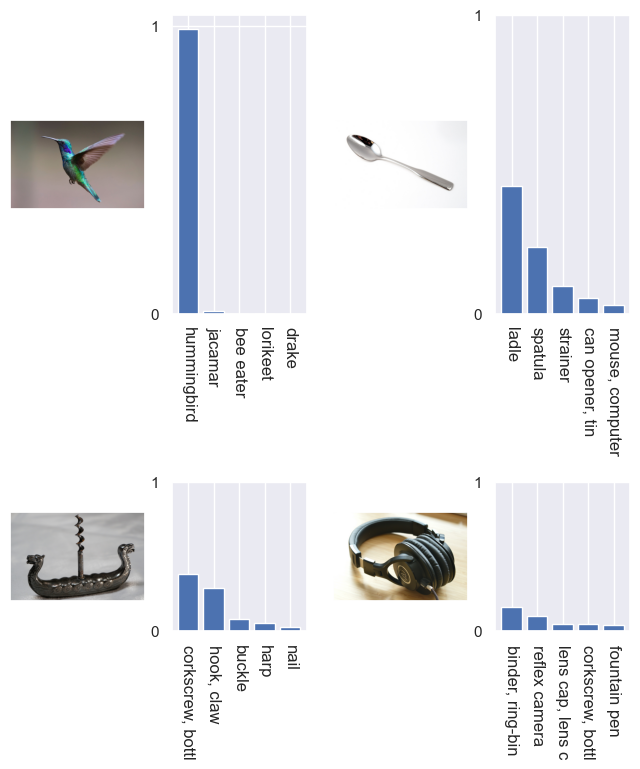

In [15]:
plot_results()

Epoch 1/12


/Users/yangjing/miniconda3/envs/learn-ai/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8486 - loss: 0.4922 - val_accuracy: 0.9819 - val_loss: 0.0601
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9704 - loss: 0.0976 - val_accuracy: 0.9831 - val_loss: 0.0498
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9800 - loss: 0.0671 - val_accuracy: 0.9875 - val_loss: 0.0373
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9831 - loss: 0.0570 - val_accuracy: 0.9874 - val_loss: 0.0370
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9844 - loss: 0.0493 - val_accuracy: 0.9893 - val_loss: 0.0330
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9901 - val_loss: 0.0310
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9889 - loss: 0.0353 - val_accuracy: 0.9906 - val_loss: 0.0302
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9897 - loss: 0.0335 - val_accurac

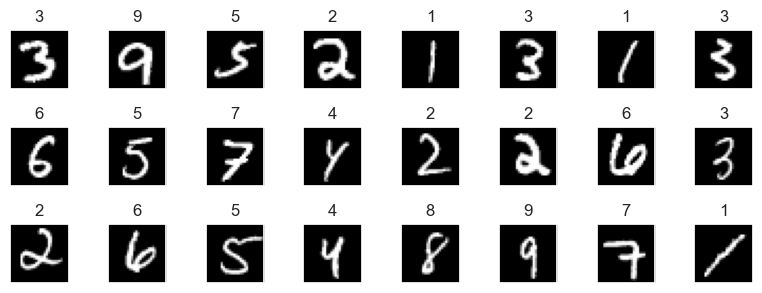

In [16]:
# Evaluate some MNIST digits by building and
# training a deep learner

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as keras_backend

# Just in case the config file isn't set up as we expect
keras_backend.set_image_data_format("channels_last")

batch_size = 128
num_classes = 10
num_epochs = 12
img_rows, img_cols = 28, 28

# Read and format MNIST image data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype("float32")  # keras_backend.cast_to_floatx(X_train)
X_test = X_test.astype("float32")  # keras_backend.cast_to_floatx(X_test)
X_train /= 255
X_test /= 255

# make labels one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# build a convnet, nothing fancy
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), strides=(2, 2), activation="relu"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
  X_train,
  y_train,
  batch_size=batch_size,
  epochs=num_epochs,
  verbose=1,
  validation_data=(X_test, y_test),
)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

grid_x = 8
grid_y = 3
plt.figure(figsize=(1 * grid_x, 2 * grid_y))
for y in range(grid_y):
  for x in range(grid_x):
    index = x + (grid_x * y)
    plt_index = x + (grid_x * y)
    plt.subplot(2 * grid_y, grid_x, 1 + plt_index)
    img_index = index + 500
    pred_data = np.reshape(X_test[img_index], (1, 28, 28, 1))
    pred = model.predict(pred_data, verbose=0)
    plt.imshow(np.reshape(X_test[img_index], (28, 28)), cmap="gray")
    plt.xticks([], [])
    plt.yticks([], [])
    plt.title(str(np.argmax(pred)))
plt.tight_layout()
file_helper.save_figure("mnist-convnet-predictions")
plt.show()